Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn

from sklearn.preprocessing import PolynomialFeatures as poly_transform
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from numpy.random import normal
from numpy import linalg

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
print("X:\n", X)
print("y:\n", y)

X:
 [[0]
 [1]
 [2]
 [4]]
y:
 [4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
# Vaš kôd ovdje
phi = poly_transform(1).fit_transform(X)
print("𝚽:\n", phi)

𝚽:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
# Vaš kôd ovdje
w = np.dot(np.dot(np.linalg.inv(np.dot(phi.T, phi)), phi.T), y)
w_pseudo = np.dot(linalg.pinv(phi), y)

print("Težine w  preko formule: ", w)
print("\nTežine w preko pseudo inverza:", w_pseudo)

Težine w  preko formule:  [2.2        0.45714286]

Težine w preko pseudo inverza: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
# Vaš kôd ovdje
h = np.dot(phi, w)
mse = MSE(y, h)

print("Primjeri iz D:\n", phi)
print("\nFunkcija h:", h)
print("\nSrednja kvadratna pogreška učenja (MSE): {}".format(mse))

Primjeri iz D:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]

Funkcija h: [2.2        2.65714286 3.11428571 4.02857143]

Srednja kvadratna pogreška učenja (MSE): 2.0428571428571427


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje
try:
    w_wrong = np.dot(linalg.inv(phi), y)
    print(w_wrong)
except:
    print("Greška! Inverz nije moguće izračunati na ovaj način!\n") 
    
phi_d3 = poly_transform(3).fit_transform(X)
w_test = np.dot(linalg.inv(phi_d3), y) 

print("Preslikavanje D u veću dimenziju daje:")
print(phi_d3)
print("\nTežine w za višu dimenziju:", w_test)

Greška! Inverz nije moguće izračunati na ovaj način!

Preslikavanje D u veću dimenziju daje:
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]

Težine w za višu dimenziju: [ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
# Vaš kôd ovdje
model = LinearRegression()
model = model.fit(phi, y)

predictions = model.predict(phi)
mse_on_predicted = MSE(y, predictions)

print("Prethodno izračunate težine: {} | Težine modela:{}".format(w, [model.intercept_, model.coef_[1]]))
print("\nPredikcije modela:", predictions)
print("\nPrehodno izračunata greška: {:.6f} | Greška na predikcijama: {:.6f}".format(mse, mse_on_predicted))

Prethodno izračunate težine: [2.2        0.45714286] | Težine modela:[2.2, 0.4571428571428572]

Predikcije modela: [2.2        2.65714286 3.11428571 4.02857143]

Prehodno izračunata greška: 2.042857 | Greška na predikcijama: 2.042857


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    y = numpy.zeros(shape=X.shape)
    for idx in range(0, X.shape[0]):
        y[idx] = f(X[idx]) + normal(0, noise)
    return y
    
def f(x):
    return 5 + x - 2*(x ** 2) - 5*(x**3)

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

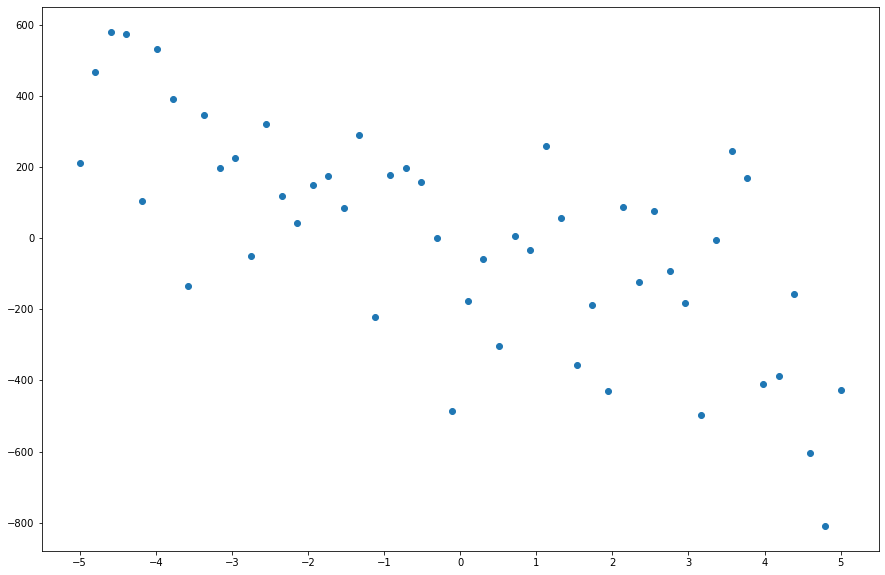

In [11]:
# Vaš kôd ovdje
plt.figure(figsize=(15,10))
scatter(X, y)
plt.xticks(range(-5, 6));

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

MSE predikcije: 45407.364101984196


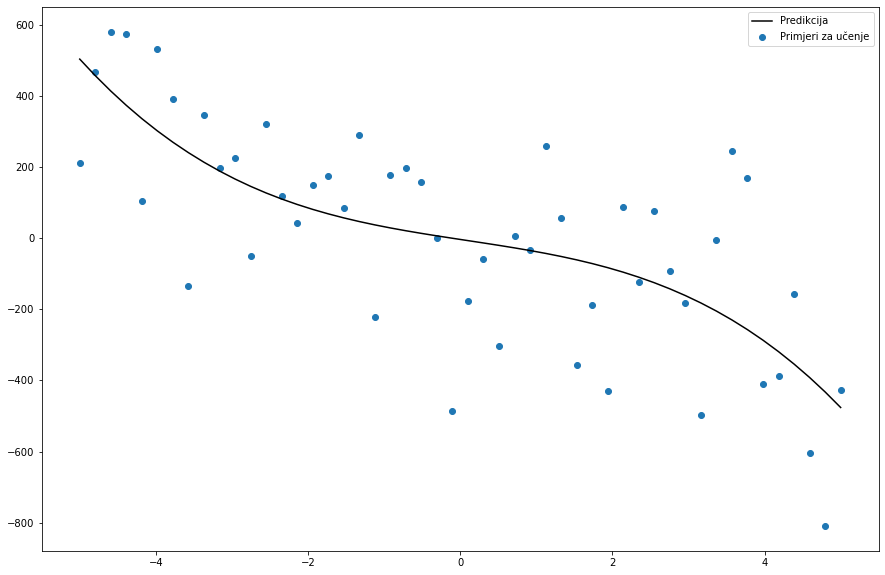

In [12]:
# Vaš kôd ovdje
phi = poly_transform(3).fit_transform(X)

w = np.dot(linalg.pinv(phi), y)
h = np.dot(phi, w)

fig = plt.figure(figsize=(15,10))
plt.scatter(X,y, label='Primjeri za učenje')
plt.plot(X,h, color='black', label='Predikcija')
legend();

mse_error = MSE(y, h)
print("MSE predikcije: {}".format(mse_error))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

d=1, MSE = 48187.27933980528
d=3, MSE = 45407.3641019842
d=5, MSE = 41969.96396069155
d=10, MSE = 35554.666882843776
d=20, MSE = 27523.056387847504


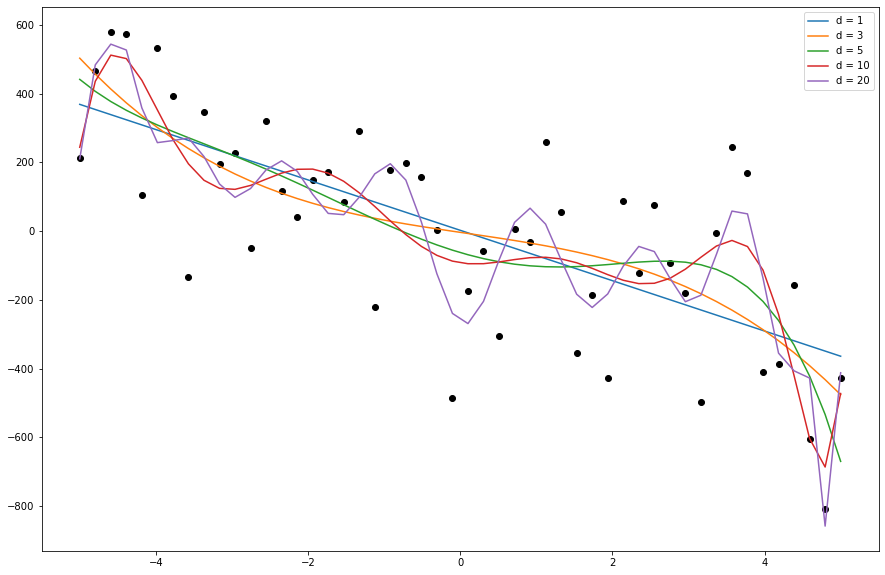

In [13]:
# Vaš kôd ovdje
dimensions = [1, 3, 5, 10, 20]
fig = plt.figure(figsize=(15, 10))
plt.scatter(X, y, color='black')

for dimension in dimensions:
    phi = poly_transform(dimension).fit_transform(X)
    
    model = LinearRegression().fit(phi, y)
    h = model.predict(phi)
    
    mse_error = MSE(y, h)
    
    plt.plot(X, h, label='d = {}'.format(dimension))
    print("d={}, MSE = {}".format(dimension, mse_error))
plt.legend();

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

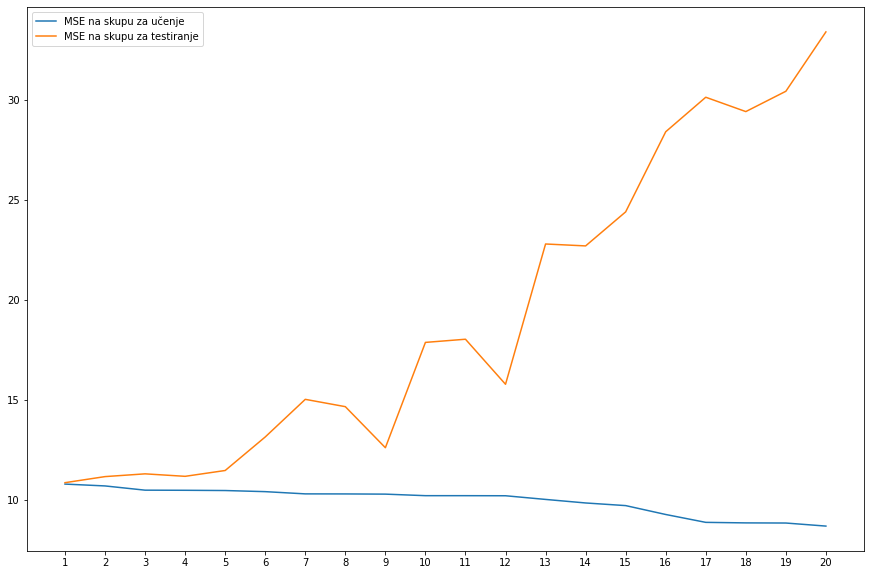

In [14]:
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
train_error = []
test_error = []

for dimension in range(1, 21):
    phi = poly_transform(dimension).fit_transform(X_train)
    phi_test = poly_transform(dimension).fit_transform(X_test)
    
    model = LinearRegression().fit(phi, y_train)
    
    h = model.predict(phi)
    predictions = model.predict(phi_test)
    
    train_error.append(np.log(MSE(y_train, h)))
    test_error.append(np.log(MSE(y_test, predictions)))
    
fig = plt.figure(figsize=(15,10))
plt.plot(range(1, 21), train_error, label='MSE na skupu za učenje')
plt.plot(range(1, 21), test_error, label='MSE na skupu za testiranje')
plt.xticks(range(1, 21))
legend();

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

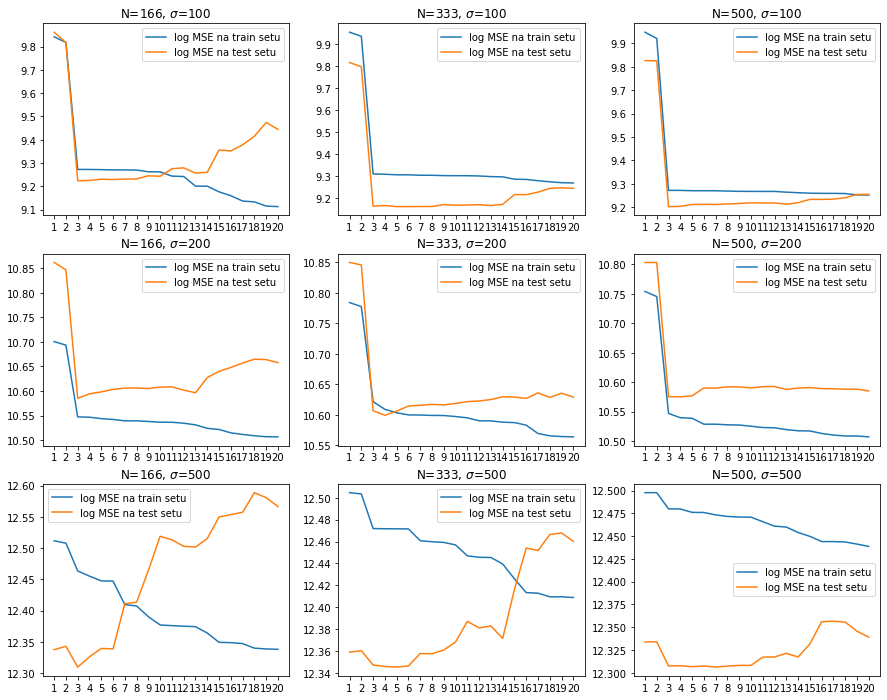

In [15]:
# Vaš kôd ovdje
fig = plt.figure(figsize=(15,12))

X_3c = make_instances(-5, 5, 1000)
X_3c_test, X_3c_train = train_test_split(X_3c, test_size=0.5)

noises = [100, 200, 500]
sizes = [1/3, 2/3, 1]
subplots = 331

for noise in noises:
    y_3c_train = make_labels(X_3c_train, f, noise)
    y_3c_test = make_labels(X_3c_test, f, noise)
    
    for size in sizes:
        max_idx = int(size*500)
        tmp_X_train = X_3c_train[0:max_idx]
        tmp_X_test = X_3c_test[0:max_idx]
        tmp_y_train = y_3c_train[0:max_idx]
        tmp_y_test = y_3c_test[0:max_idx]
        
        train_error = []
        test_error = []
        
        for dimension in range(1, 21):
            phi = poly_transform(dimension).fit_transform(tmp_X_train)
            phi_test = poly_transform(dimension).fit_transform(tmp_X_test)
            
            model = LinearRegression().fit(phi, tmp_y_train)
            h = model.predict(phi)
            predictions = model.predict(phi_test)
            
            train_error.append(np.log(MSE(h, tmp_y_train)))
            test_error.append(np.log(MSE(predictions, tmp_y_test)))
        
        plt.subplot(subplots)
        plt.plot(range(1, 21), train_error, label='log MSE na train setu')
        plt.plot(range(1, 21), test_error, label='log MSE na test setu')
        plt.xticks(range(1, 21))
        plt.title("N={}, $\sigma$={}".format(max_idx, noise))
        legend();
        subplots += 1
        

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje
X_1 = np.array([[0],[1],[2],[4]])
y_1 = np.array([4,1,2,5])

phi = poly_transform(3).fit_transform(X_1)
print("𝚽:\n", phi)

identity = np.identity(4)
identity[0][0] = 0
print("𝐈:\n", identity)

for reg_coeff in (0, 1, 10):
    w = np.dot(np.dot(linalg.inv(np.dot(phi.T, phi) +  reg_coeff * identity), phi.T), y_1)
    print("\nZa 𝜆 = {}, težine su:\n".format(reg_coeff), w)

𝚽:
 [[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
𝐈:
 [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Za 𝜆 = 0, težine su:
 [ 4.         -5.91666667  3.375      -0.45833333]

Za 𝜆 = 1, težine su:
 [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]

Za 𝜆 = 10, težine su:
 [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
# Vaš kôd ovdje
for alpha in (0, 1, 10):
    model = Ridge(alpha).fit(phi, y_1)
    
    w = model.coef_.copy()
    w[0] = model.intercept_
    
    print("Za 𝜆 = {}, težine su:\n{}\n".format(alpha, w))

Za 𝜆 = 0, težine su:
[ 4.         -5.91666667  3.375      -0.45833333]

Za 𝜆 = 1, težine su:
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]

Za 𝜆 = 10, težine su:
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]



### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

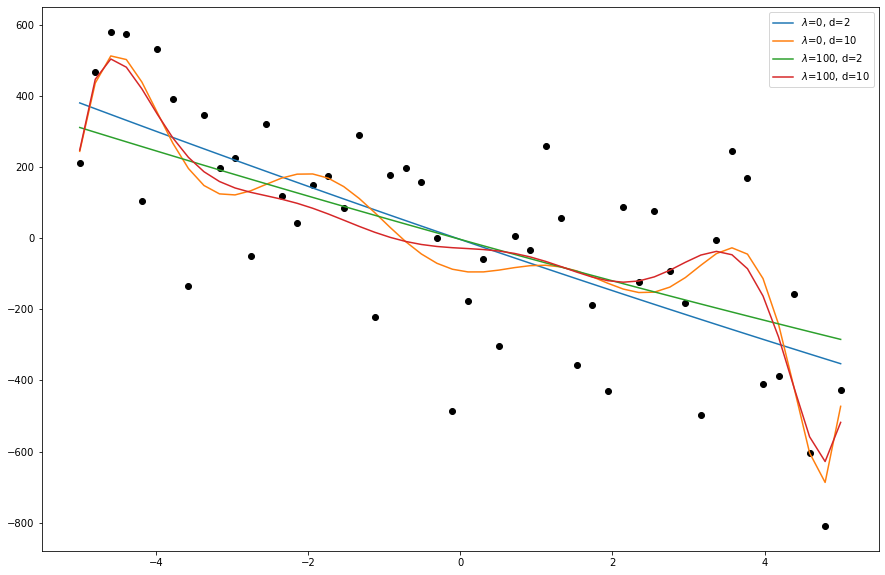

In [18]:
# Vaš kôd ovdje
fig = plt.figure(figsize=(15,10))
plt.scatter(X,y, color='black')

for reg_coeff in (0, 100):
    for dimension in (2, 10):
        phi = poly_transform(dimension).fit_transform(X)
        
        model = Ridge(reg_coeff).fit(phi, y)
        
        h = model.predict(phi)
        
        plt.plot(X, h, label = "$\lambda$={}, d={}".format(reg_coeff, dimension))

plt.legend();

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


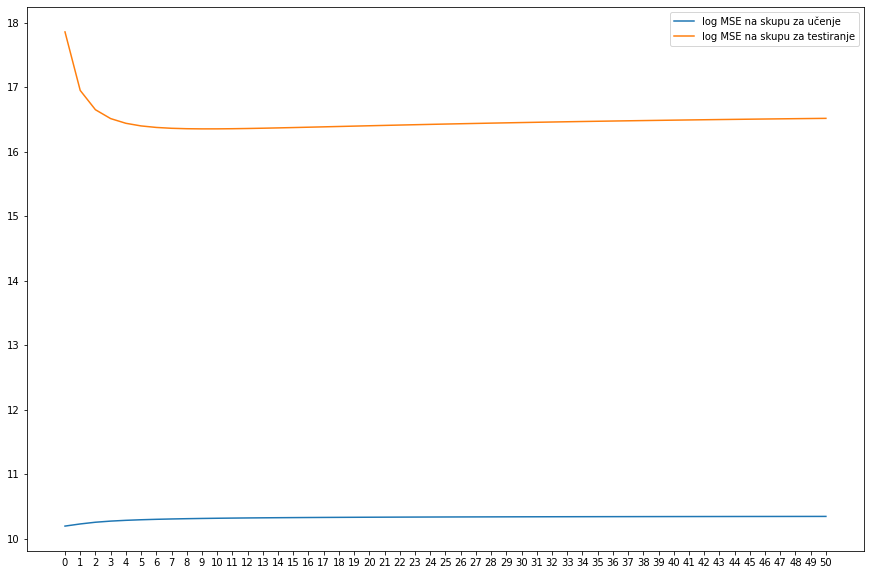

In [19]:
# Vaš kôd ovdje
train_error = []
test_error = []

for reg_coeff in range(0, 51):
    phi = poly_transform(10).fit_transform(X_train)
    phi_test = poly_transform(10).fit_transform(X_test)
    
    model = Ridge(reg_coeff).fit(phi, y_train)
    
    h = model.predict(phi)
    predictions = model.predict(phi_test)
    
    train_error.append(np.log(MSE(y_train, h)))
    test_error.append(np.log(MSE(y_test, predictions)))
    
fig = plt.figure(figsize=(15,10))
plt.plot(range(0, 51), train_error, label='log MSE na skupu za učenje')
plt.plot(range(0, 51), test_error, label='log MSE na skupu za testiranje')
plt.xticks(range(0, 51))
legend();

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

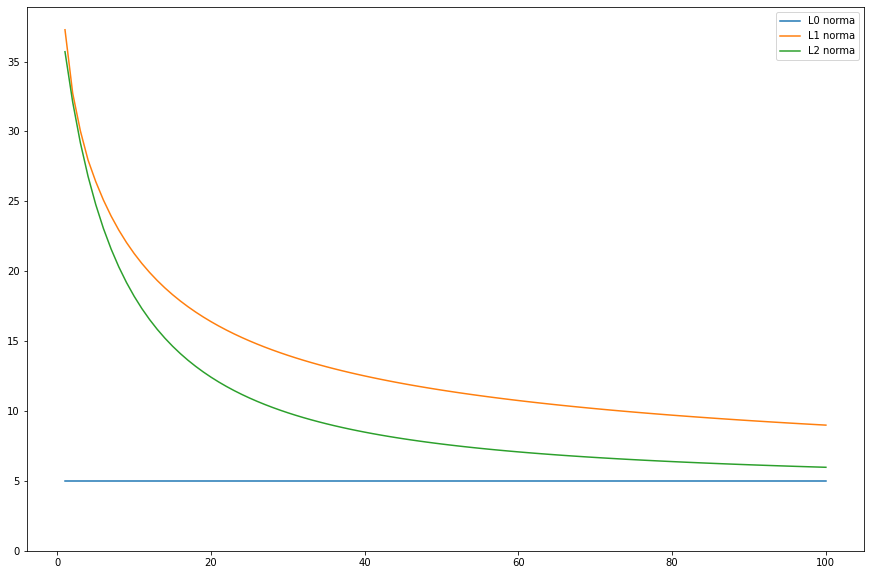

In [21]:
# Vaš kôd ovdje
dimension=5
phi = poly_transform(dimension).fit_transform(X_train)

l0 = []
l1 = []
l2 = []

for reg_coeff in range(1, 101):
    model = Ridge(alpha=reg_coeff).fit(phi, y_train)
    
    w = model.coef_
    
    l0.append(nonzeroes(w[0]))
    l1.append(np.linalg.norm(w[0], 1))
    l2.append(np.linalg.norm(w[0], 2))
    
plt.figure(figsize=(15,10))

plt.plot(range(1, 101), l0, label='L0 norma')
plt.plot(range(1, 101), l1, label='L1 norma')
plt.plot(range(1, 101), l2, label='L2 norma')
plt.ylim(0,)
legend();

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

C:\Users\Jelena\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2945.4175211319234, tolerance: 246.39064850801574
  model = cd_fast.enet_coordinate_descent(


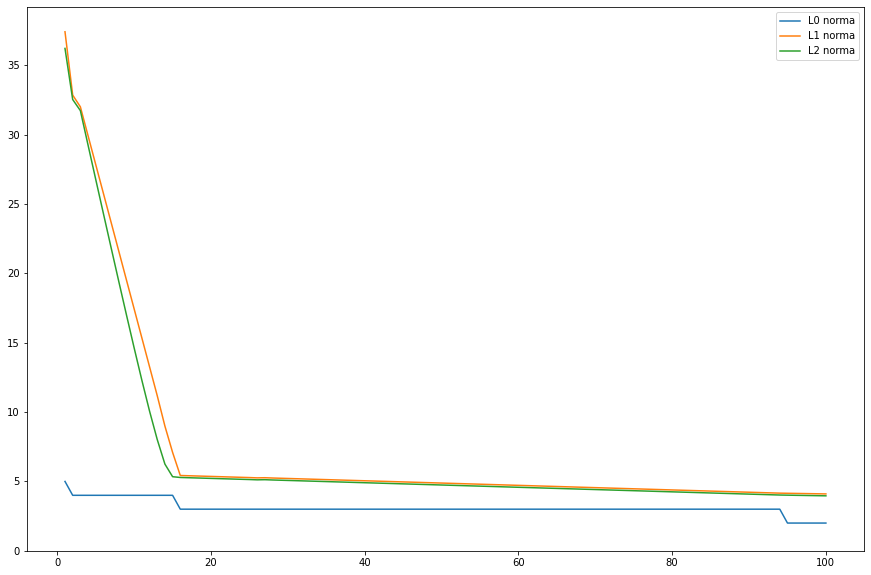

In [22]:
# Vaš kôd ovdje
l0 = []
l1 = []
l2 = []

for reg_coeff in range(1, 101):
    model = Lasso(alpha=reg_coeff).fit(phi, y_train)
    
    w = model.coef_
    
    l0.append(nonzeroes(w))
    l1.append(np.linalg.norm(w, 1))
    l2.append(np.linalg.norm(w, 2))
    
plt.figure(figsize=(15,10))

plt.plot(range(1, 101), l0, label='L0 norma')
plt.plot(range(1, 101), l1, label='L1 norma')
plt.plot(range(1, 101), l2, label='L2 norma')
plt.ylim(0,)
legend();

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

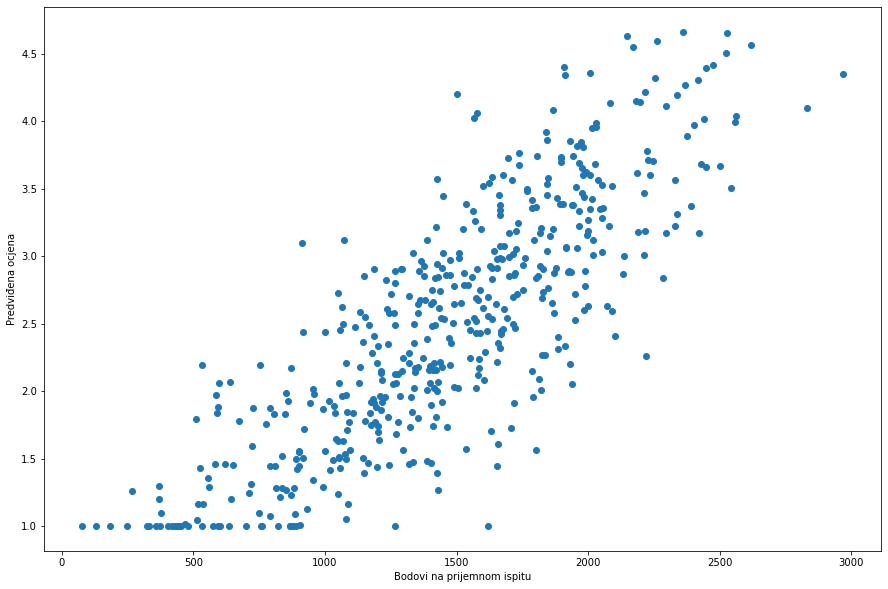

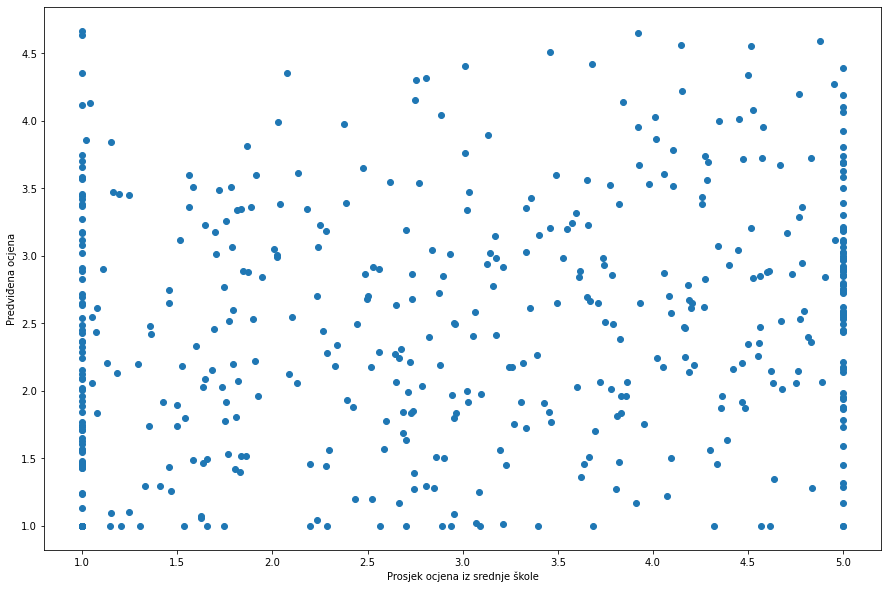

In [24]:
# Vaš kôd ovdje
plt.figure(figsize=(15,10))
plt.scatter(exam_score, grades_y)
plt.xlabel('Bodovi na prijemnom ispitu')
plt.ylabel('Predviđena ocjena')

plt.figure(figsize=(15,10))
plt.scatter(grade_in_highschool, grades_y)
plt.xlabel('Prosjek ocjena iz srednje škole')
plt.ylabel('Predviđena ocjena');

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
# Vaš kôd ovdje
model = Ridge(alpha=0.01).fit(grades_X, grades_y)
error = MSE(grades_y, model.predict(grades_X))

print("Težine su:", model.intercept_, model.coef_)
print("MSE je: {}".format(error))

Težine su: 0.15061179575776018 [0.00141497 0.09477276]
MSE je: 0.23990435033172808


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
# Vaš kôd ovdje
grades_X_fixed = StandardScaler().fit_transform(grades_X)
grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1, 1))

model = Ridge(alpha=0.01).fit(grades_X_fixed, grades_y_fixed)
error = MSE(grades_y_fixed, model.predict(grades_X_fixed))

print("Težine su:", model.intercept_, model.coef_)
print("MSE je: {}".format(error))

Težine su: [8.62551331e-17] [[0.81630375 0.15167761]]
MSE je: 0.29228757017069595


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.hstack((grades_X_fixed, np.tile(grades_X_fixed[:, [-1]], 1)))

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
# Vaš kôd ovdje
model = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
error = MSE(grades_y_fixed, model.predict(grades_X_fixed_colinear))

print("Za kolineirani model, težine su:", model.intercept_, model.coef_)
print("MSE je {}".format(error))

Za kolineirani model, težine su: [8.6255971e-17] [[0.81630364 0.07583957 0.07583957]]
MSE je 0.2922875701674416


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
# Vaš kôd ovdje

w_0_1 = []
w_0_2 = []
w_0_3 = []

w_1000_1 = []
w_1000_2 = []
w_1000_3 = []

for iteration in range(1, 11):
    grades_X_train, grades_X__test, grades_y_train, grades_y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size = 0.5)
    
    model_01 = Ridge(0.01).fit(grades_X_train, grades_y_train)
    model_1000 = Ridge(1000).fit(grades_X_train, grades_y_train)
    
    w_0_1.append(model_01.coef_[0][0])
    w_0_2.append(model_01.coef_[0][1])
    w_0_3.append(model_01.coef_[0][2])

    w_1000_1.append(model_1000.coef_[0][0])
    w_1000_2.append(model_1000.coef_[0][1])
    w_1000_3.append(model_1000.coef_[0][2])
    
    print("Iteracija {}".format(iteration))
    print("𝜆 = {}, težine = {}".format(0.01, model_01.coef_[0]))
    print("𝜆 = {}, težine = {}\n".format(1000, model_1000.coef_[0]))
    
print("Standardne devijacije: ")
print("Za 𝜆 = {}, std(težine) =  {}, {}, {}".format(0.01, np.std(w_0_1), np.std(w_0_2), np.std(w_0_3)))
print("Za 𝜆 = {}, std(težine) =  {}, {}, {}".format(1000, np.std(w_1000_1), np.std(w_1000_2), np.std(w_1000_3)))

Iteracija 1
𝜆 = 0.01, težine = [0.79385128 0.06504303 0.06504303]
𝜆 = 1000, težine = [0.16436364 0.03812874 0.03812874]

Iteracija 2
𝜆 = 0.01, težine = [0.80739011 0.0761075  0.0761075 ]
𝜆 = 1000, težine = [0.15992321 0.02415424 0.02415424]

Iteracija 3
𝜆 = 0.01, težine = [0.814158   0.07673386 0.07673386]
𝜆 = 1000, težine = [0.16128257 0.02717137 0.02717137]

Iteracija 4
𝜆 = 0.01, težine = [0.83265053 0.07483515 0.07483515]
𝜆 = 1000, težine = [0.16579999 0.03405283 0.03405283]

Iteracija 5
𝜆 = 0.01, težine = [0.79735626 0.08013669 0.08013669]
𝜆 = 1000, težine = [0.15703356 0.02664742 0.02664742]

Iteracija 6
𝜆 = 0.01, težine = [0.81845427 0.04525193 0.04525193]
𝜆 = 1000, težine = [0.17833349 0.03188297 0.03188297]

Iteracija 7
𝜆 = 0.01, težine = [0.80086373 0.0614553  0.0614553 ]
𝜆 = 1000, težine = [0.15563723 0.022474   0.022474  ]

Iteracija 8
𝜆 = 0.01, težine = [0.81216485 0.06648337 0.06648337]
𝜆 = 1000, težine = [0.16174675 0.03077003 0.03077003]

Iteracija 9
𝜆 = 0.01, težine = [

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.